## <center> <h1> <b> Machine Learning Tutorial for Text Data - Wordcloud </b> </h1> </center>

## <center> A Data Visualization Tutorial by Neha Tiwari </center>

### Introduction:

While there is a plethora of Machine Learning visualizations that can be implemented on numerical data, methods for visualizing machine learning outcomes for text-based data are relatively limited. These visualizations can be descriptive or analytical. Most such processes also require a fair amount of data pre-processing for best results. 

One of the many techniques is WordCloud. A Wordcloud is a visual representations of words that give greater prominence to words that appear more frequently. The prominence is indicated via font size and sometimes color. 

In the following tutorial I will be working with Airbnb user-review data for Washington D.C. sourced from Kaggle. I want to analyze what are the most frequently used words across all airbnb reviews. Through this exercise we hope to estimate what are the most important aspects for airbnb users by summarizing the corpus of roughly 350,000 reviews into the most frequently occuring words.  

I will be using Python `wordcloud` library which enables us to build a wordcloud directly from a text corpus. It function arguments also allows the user to customize the shape, color, hues, and font of the words in it, besides allowing specifying regular or customized `stopwords`. However, the library doesn't have many arguments to clean the corpus itself through text processing and hence it is necessary to clean the corpus using data-wrangling techniques before building a wordcloud to get the best summary of the data.

Some of the methods of pre-processing required are:
- removing stopwords, 
- removing special characters,
- removing words and characters for eg. in a foreign language,
- reducing number of features,
- named-entity removal

Once we have cleaned the data we would also play around with wordcloud arguments to customize its aesthetics in the form of the font size and color, cloud shape, among others. 

### Installation:

If you receive an error message that there is no module named 'wordcloud', you can use install it with either of the following:

`pip install wordcloud` or 

`conda install -c conda-forge wordcloud`

### Data

As mentioned above, I will be using [Airbnb review data for Washington D.C. from Kaggle](https://github.com/nt03/dviz_ML_tutorial/tree/master/proj3-airbnb/data/airbnb). 
The dataset contains the following relevant variables:
- `listing_id`: the unique identifier for an airbnb listing
- `comments`: the review made by a user

Currently, the data is in a long format. I will flatten it by condensing all reviews pertaining to a listing in one row. Once I have all reviews I will concatenate them in a single list to create a text corpus. This will form our input for the `wordcloud` function. We will be applying all data wrangling techniques on this corpus. 

In [1]:
#read in data

import pandas as pd

df = pd.read_csv(r"..\data\airbnb\reviews.csv.gz", compression='gzip', low_memory = False)

df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3344,2185,2009-05-09,12016,Tony,The stay at Amos' condo greatly exceeded my ex...
1,3344,18774,2009-11-29,40724,Faris,"What can I say? AJ picked me up from Dulles, ..."
2,3344,20550,2009-12-16,58506,Sean,Amos is a phenomenal host. Where to start? Fir...
3,3344,293978,2011-06-01,583926,Yewwee,Aj is a great and friendly host! Excellent loc...
4,3344,296775,2011-06-04,503189,Jonathan,"As a first-time airbnb.com user, I am glad Amo..."


In [2]:
# combine all reviews for a listing in one entry

df = df[['listing_id', 'comments']]

reviews = []

#extract all unique listings and concatenate all reviews per listing and append the (listing_id, review) tuple in a list
for l in list(set(df.listing_id)):
    d = df[df['listing_id'] == l] 
    r = ''.join([str(a) for a in d.comments.to_list()])
    reviews.append((l,r))

# convert the list in a dataframe    
reviews = pd.DataFrame(reviews, columns =['id', 'reviews'])

reviews.head()

,id,reviews
0,2097166,The home is situated in Palisades which was ce...
1,10354707,Becca was very welcoming and accommodating to ...
2,2818072,This was my first experience using Airbnb. It ...
3,34537497,Nana is really nice and patient for any questi...
4,28835868,Great apartment in a nice area of dc


In [3]:
#create the corpus

corpus = " ".join(reviews.reviews.to_list())

In [4]:
#import required libraries

# import wordcloud package
from wordcloud import WordCloud

#import matplotlib to plot the wordcloud
import matplotlib.pyplot as plt 

#data cleaning packages
import re
import spacy

#### Word Cloud with no text pre-processing

First we will start with a simple wordcloud with default agrument settings. Here, if `stopwords = None`, the build-in stopwords list will be used.

In [6]:
wordcloud = WordCloud().generate(corpus) 

The function returns a wordcloud object that can be plotted using a visualizing library like `matplotlib`.

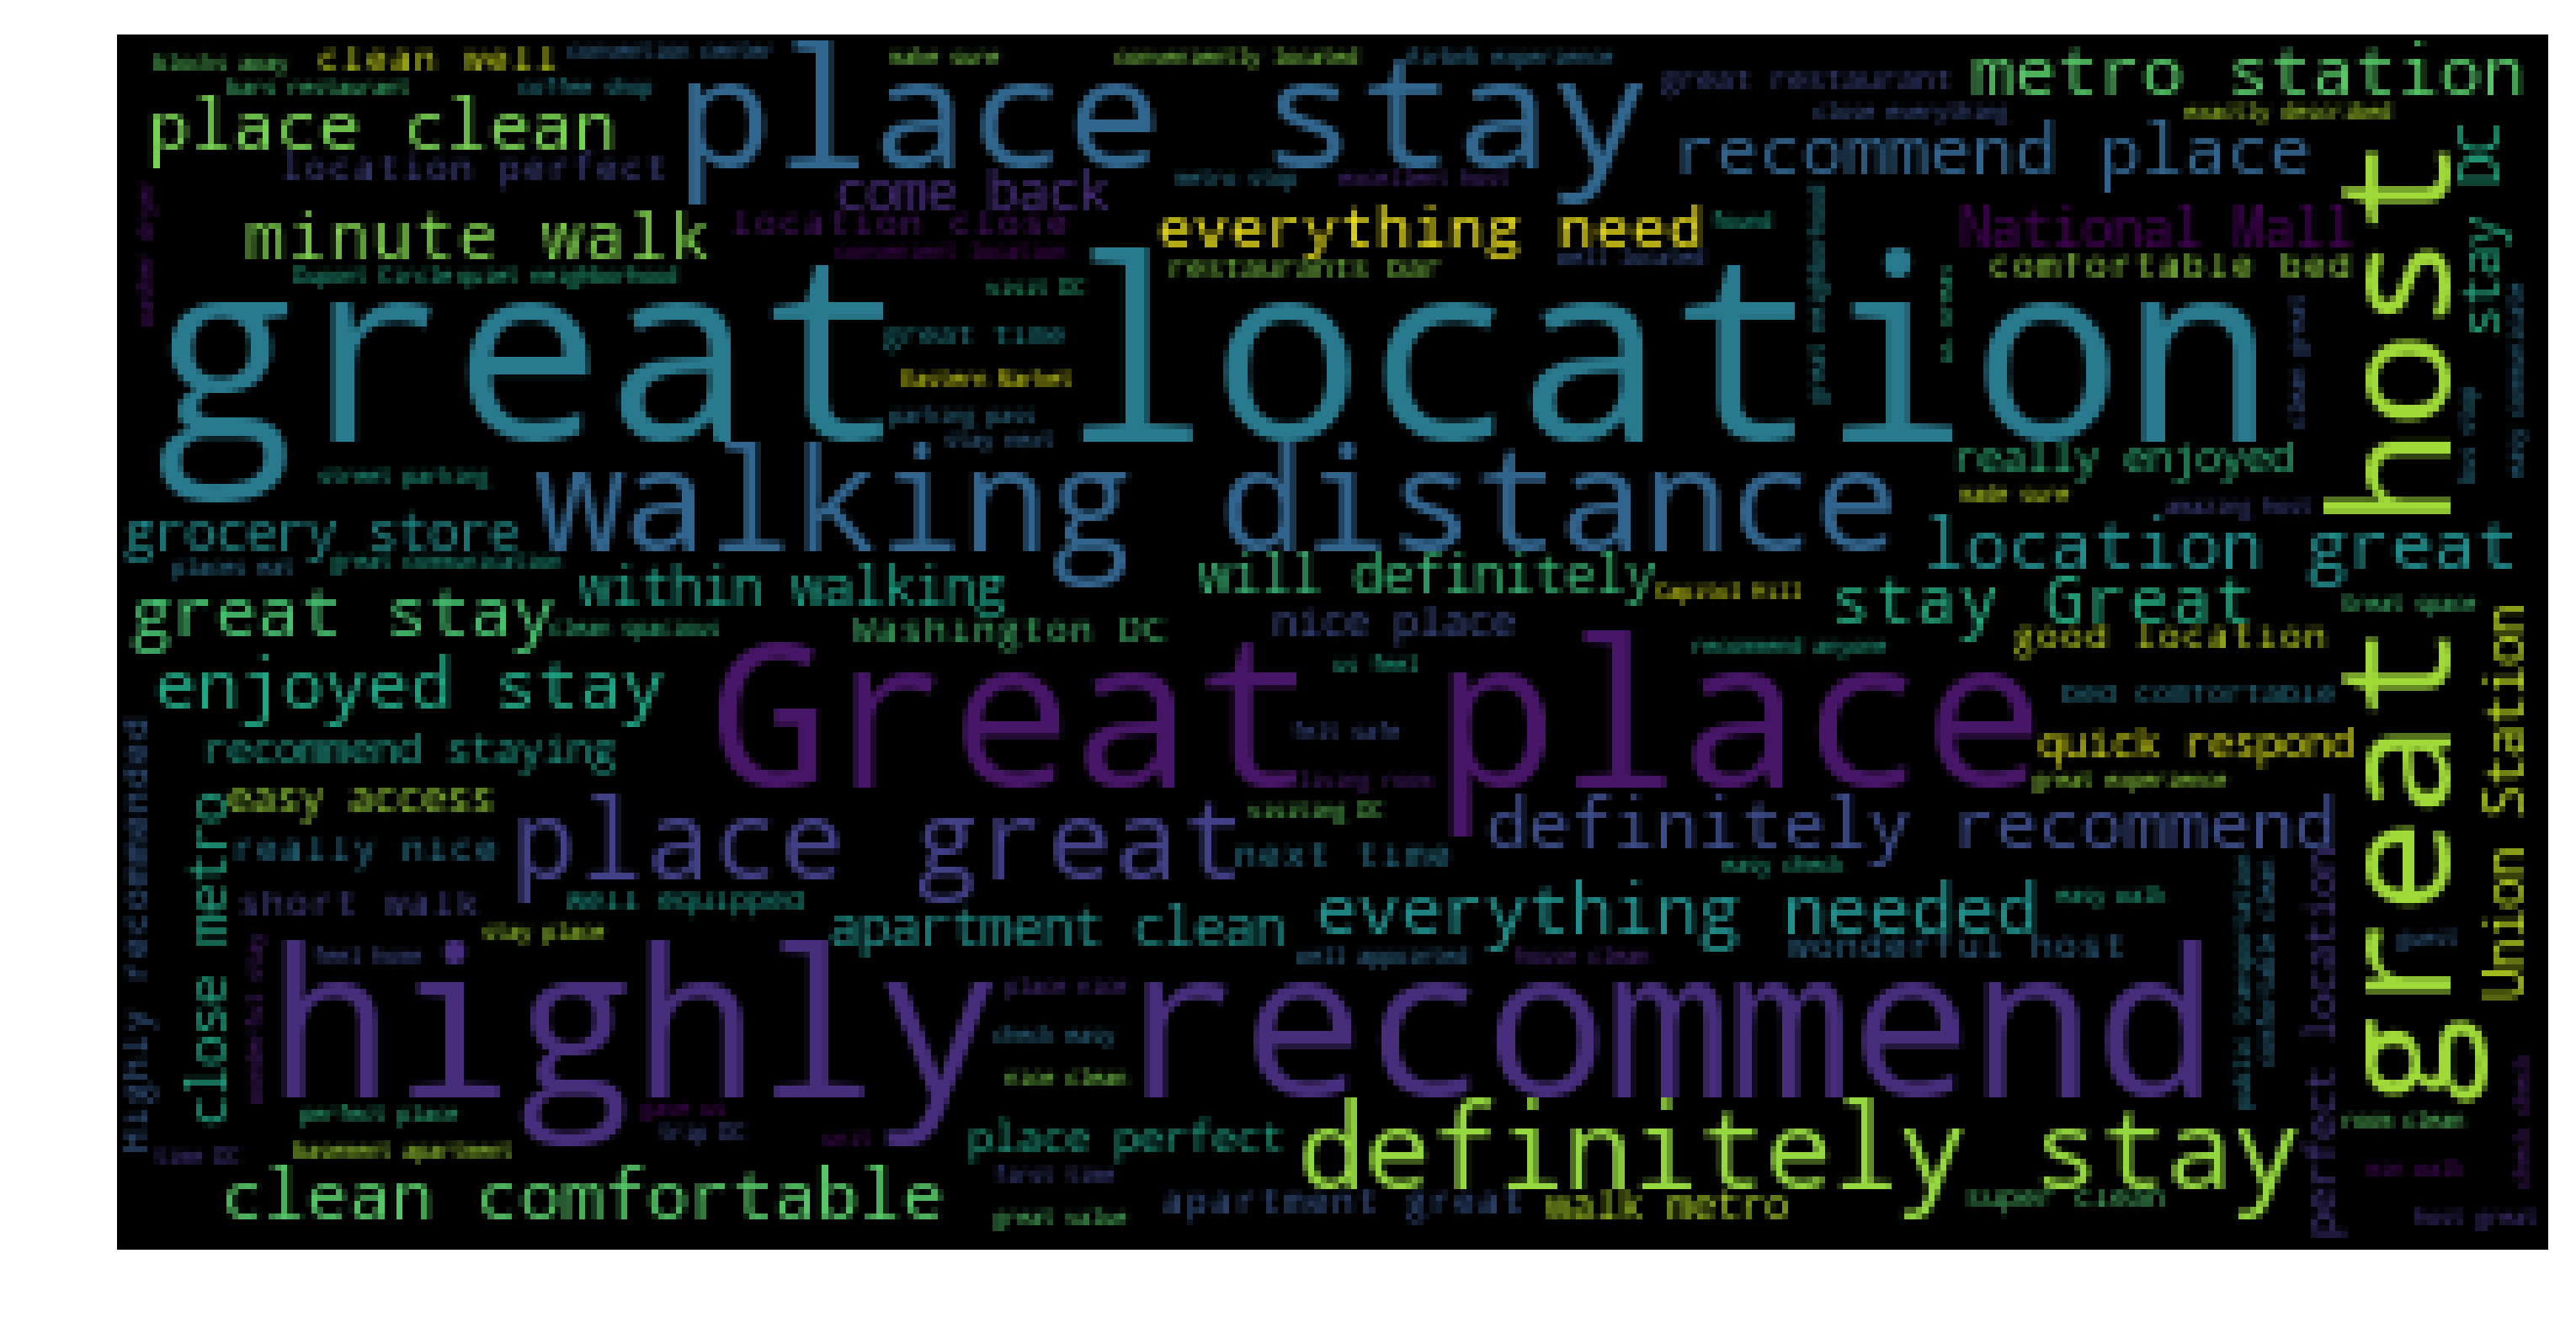

In [7]:
# plot the Wordcloud using matplotlib 

plt.figure(figsize = (10, 10), facecolor = None, dpi=300) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

From the above figure we can recognize the following issues to be resolved through text processing:    
    
- **Collocations**: we notice that there is repetition of certain words like 'great' and 'definitely' as phrases. `wordcloud` library has `collocations=True` as default. Collocation groups words that frequently occur together. To remove this feature we can make `collocations=False` in the function.       
   
   
- **Stopwords**: Additionally, adjectives like 'great', 'wonderful' don't really add to our analysis. We can remove these words from consideration by adding them to the stopwords list. Adding to stopwords list is a very subjective task and depends on the specific use case. Stop words are generally the most common words in a language. Here we have used the list of English stopwords from NLTK library. The list can be expanded upon by manually adding any redundant or irrelavant words which are traditionally not part of in-built stopwords list.     
   
   
- **Lemmatization**: Different forms of words like 'walking' and 'walk' are repeated in the wordcloud while conveying the same idea. Clearly there is a need to reduce the words to their root form as the wordcloud function fails to treat them similarly and injects redundancy in the outcome. This can be resolved by data cleaning techniques of stemming and lemmatization. Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word. We will use `SpaCy` library to reduce all tokens to their root form.    
    
    
- **Named-Entities (NE)**: A named entity is a real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. We can find NEs like Dupont, DC, US, Airbnb in the cloud. NE are not relevant to our particular use case. We can remove them using `ent` token attribute using `SpaCy` library.  

- **Coloring**: the default `colormap = Viridis` which is not colorblind friendly as well as difficult in estimating the relative frequency of words. 


### Word cloud after removing stopwords

In [8]:
#import english stopwords from nltk library
from nltk.corpus import stopwords

stop = stopwords.words('english')

If there is nltk not found error, then install nltk using the following command in terminal and rerun the above code cell:

`pip install nltk`

In the above wordcloud I also noticed a lot of irrelavant words which can be removed by adding them to the stopwords list. 

In [9]:
#initialize a list of case specific stop words and add them to the previous stop list
words = []
words = ['great', 'would', 'should', 'could', 'dc', 'washington', 'us', 'airbnb', 'highly', 'definitely', 'really', 
         'like', 'place', 'house', 'apartment', 'home', 'room','nice', 'stay', 'easy', 'beautiful', 'good', 'love',
        'perfect', 'excellent', 'awesome', 'amazing', 'wonderful', 'comfortable', 'need', 'lovely', 'well', 
        'street', 'day', 'minute', 'pron', 'thank', 'closemake', 'everything', 'recommend', 'also', 'super', 'make', 'feel', 'night']

for w in words:
    stop.append(w)

First, I have used [this code](https://github.com/nt03/dviz_ML_tutorial/tree/master/proj3-airbnb/codes) to get the root word or lemma for each token in the reviews dataframe as well as remove all named-entites from the reviews. The code uses `SpaCy` library, which is a natural language processing library in Python, to achieve the above task. 

As the code takes a while to run on the large corpus I am using the cleaned data directly. 

In [10]:
reviews = pd.read_csv("../data/airbnb/reviews_cleaned_lemma2.csv")

Next we can remove all special characters and digits, specifically anything other than alphabets using a regular expressions from `re` library. 

In [11]:
#remove digits and special characters using regex

pattern = r'[^a-zA-Z\s]'

reviews.reviews = reviews['reviews'].apply(lambda row: re.sub(pattern, '', row))

Convert everything to lowercase to remove case-senstivity

In [12]:
reviews.reviews = reviews.reviews.str.lower()

In [13]:
reviews.head()

,Unnamed: 0,id,reviews,lemma_notent
0,0,2097166,home situated palisades central everywhere nee...,cleaning ' way guest difficult residential lou...
1,1,10354707,becca welcoming accommodating checkin checkout...,cleaning morning big th attention mat animal e...
2,2,2818072,first experience using airbnb good experience ...,requeste againj'ai truei attend way guest yogu...
3,3,34537497,nana really nice patient question house lovely...,understand not clean purchase here nana be gue...
4,4,28835868,great apartment nice area dc,apartment great nice dc area


Now that I have cleaned the data to all possible extent, I will create the corpus again to create a wordcloud. 

In [14]:
#create the corpus

corpus = " ".join(reviews.lemma_notent.to_list())

Now, using the updated list of stopwords and cleaned corpus I will create a wordcloud. I will also change the color of the text from `default = "Viridis"` to `"Greys"` to make it colorblind friendly as well as make `collocations=False`.

In [15]:
# create the wordcloud with cleaned text

wordcloud = WordCloud(width = 800, height = 800, 
                 stopwords=stop,
                      colormap= "Greys", 
                      background_color = "white",
                      collocations=False,
                min_font_size = 10).generate(corpus) 

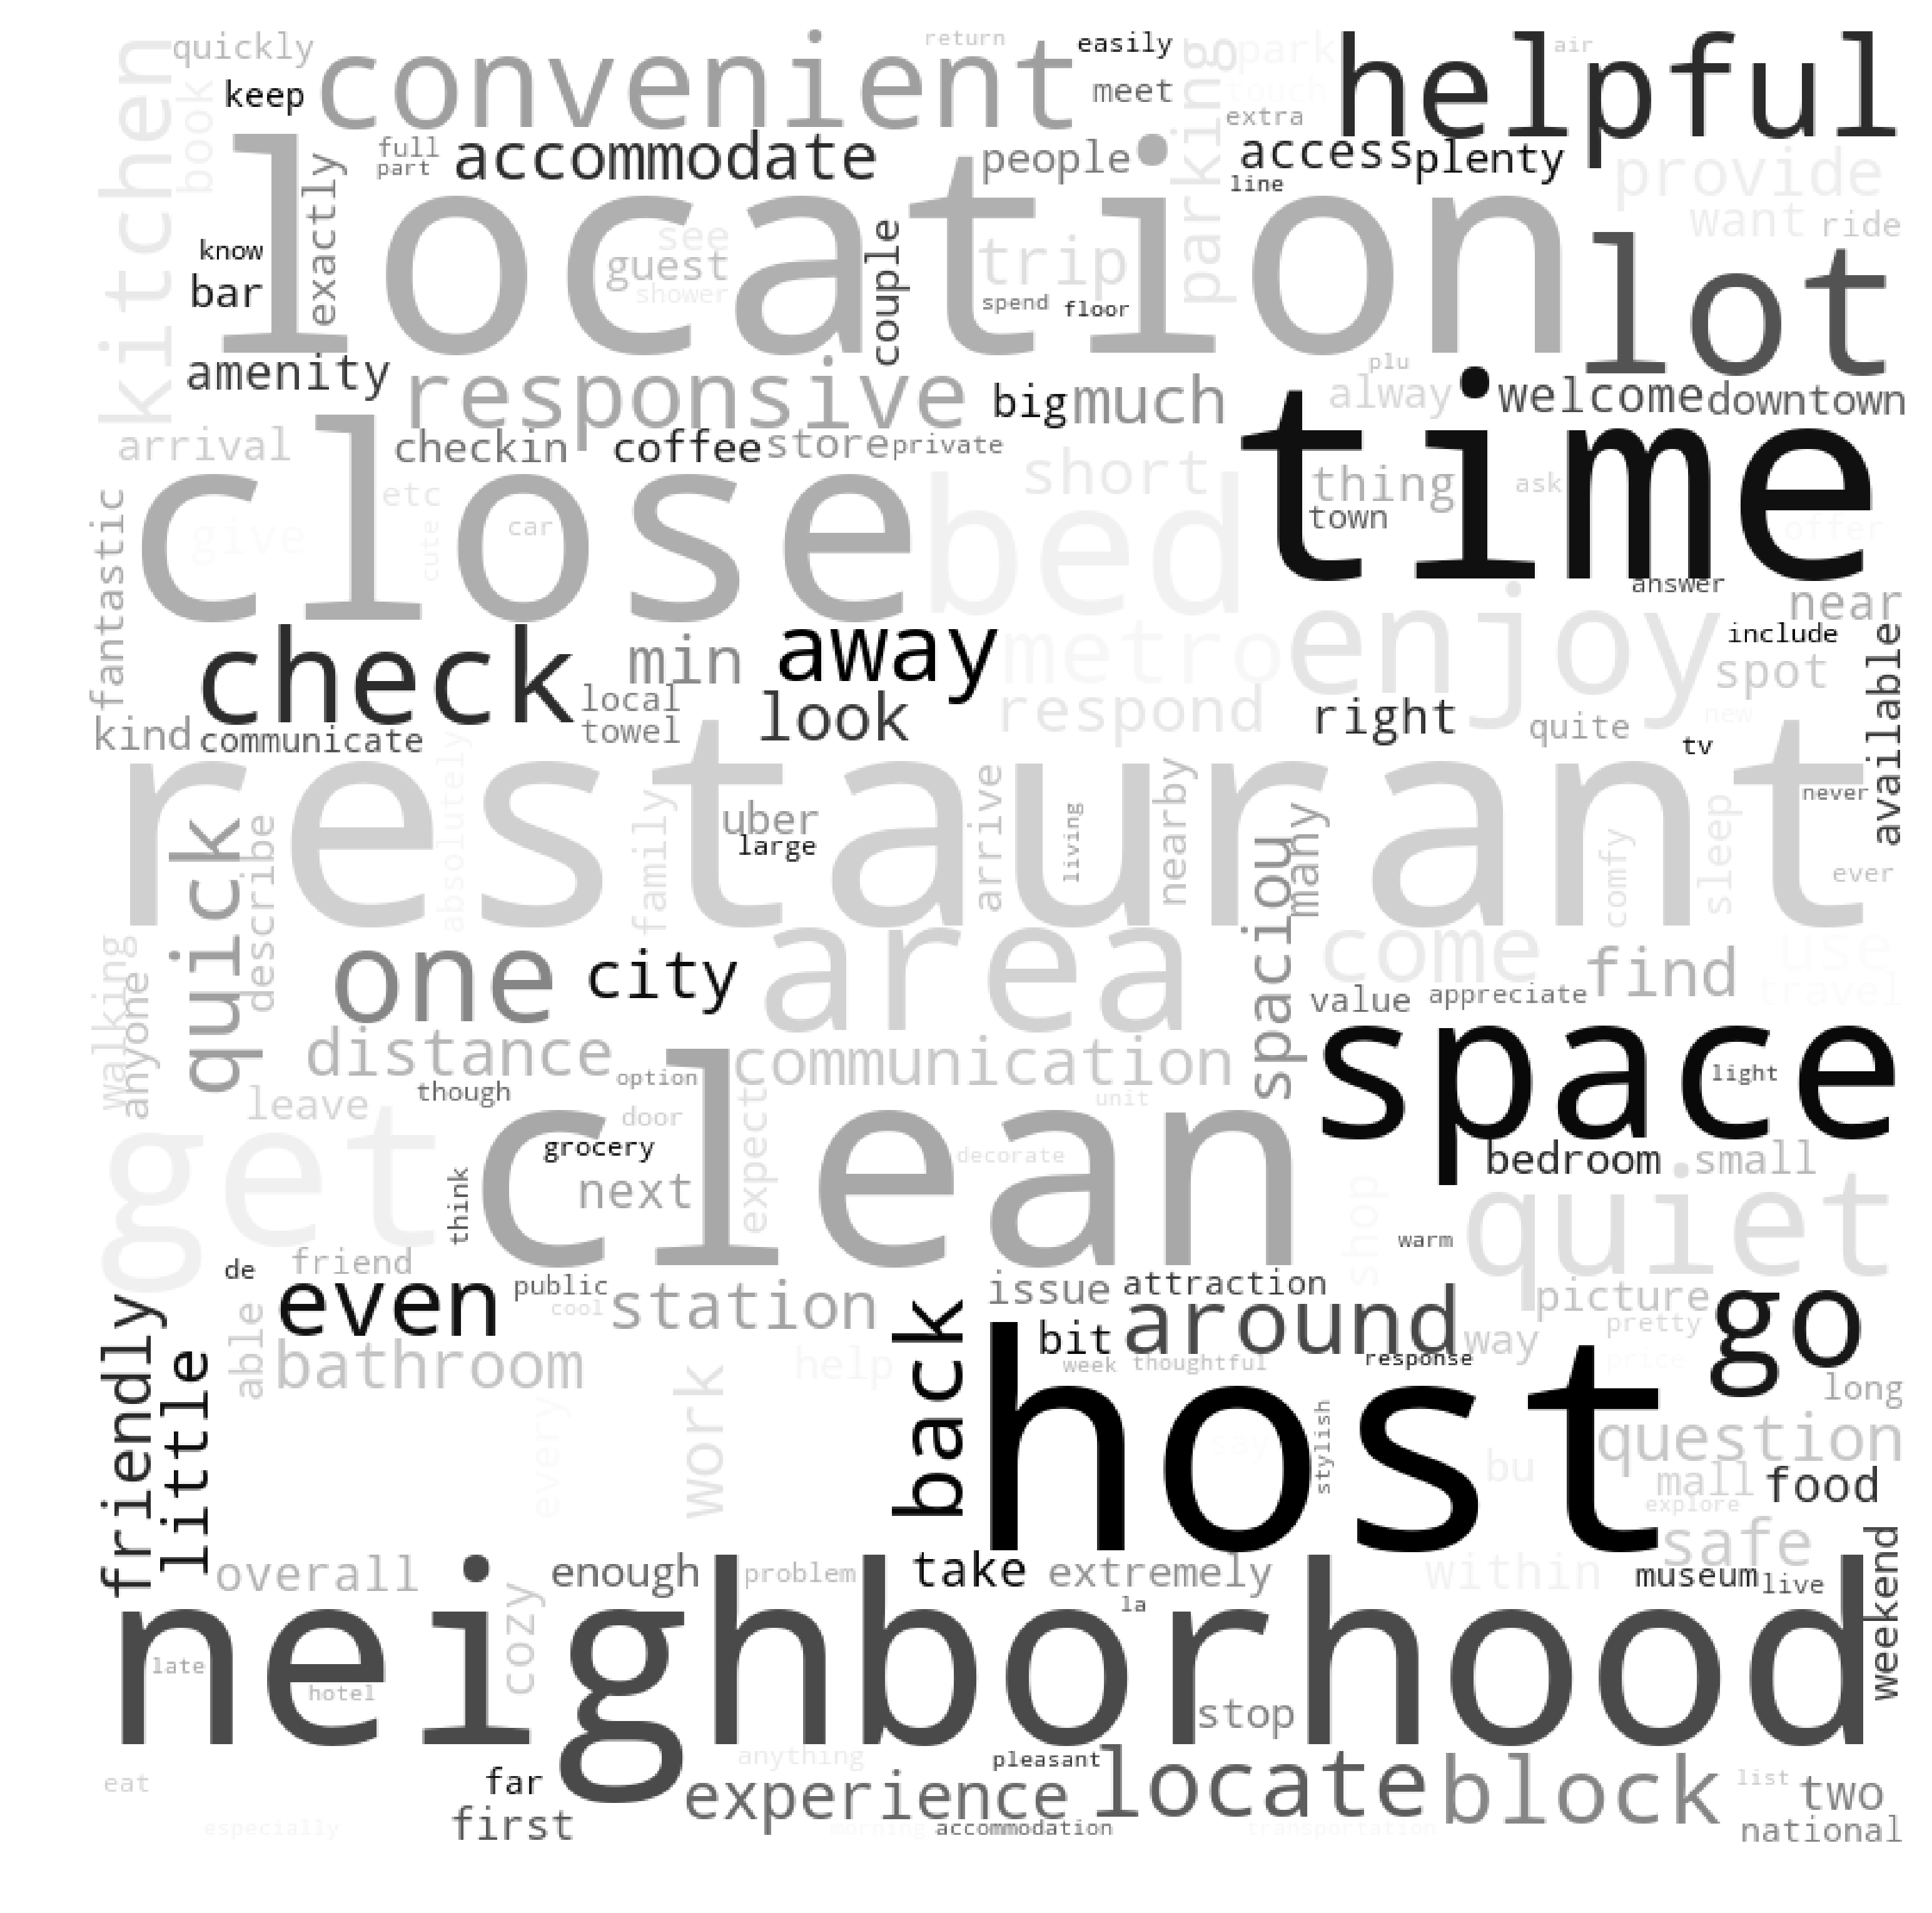

In [16]:
# plot the WordCloud image using matplotlib                      
plt.figure(figsize = (10, 10), facecolor = None, dpi=300) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

I find the varying hue and opacity helpful as it is allowing me to focus better on the more frequently occuring words. 

From the above wordcloud I can derive the following insights from the reviews:
- location and neighborhood is very important
- host characteristics are important for the user - possibly responsiveness, verified or not, nature, etc.
- metro and restuarant closeness seem to be a factor
- cleanliness is another key aspect 

### Customize wordcloud:

Using function arguments we can change the font type and size, color and hue, mask shape, background color, size of canvas of wordclouds. Some arguments are:

- `width` and `height`: width and height of the canvas
- `mask`: shape of the canvas. We can input a nd-array to customize the mask.
- `min_font_size` and `min_font_size`: min and max font size of the text
- `background_color`: the color of the background. default is black.
- `color_func`: Callable with parameters word, font_size, position, orientation,
    font_path, random_state that returns a PIL color for each word.
- `colormap`: Matplotlib colormap to randomly draw colors from for each word. Default is viridis.

We have already tried the `font_size`, `canvas height/width`, `background_color` and `colormap` functions above. I will now try to use `color_func` to provide a function to customize color mapping.

The [following chunk](https://stackoverflow.com/questions/43043263/word-cloud-in-python-with-customised-colour) defines a function `random_color_func()` that is creating colours of the same hue but with different luminosities. We just need decide which hue you want. So for orange, you could consider using a value of 21, for example:

In [17]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [18]:
#wordcloud with black background and customized colors
wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stop,
                collocations=False,
                min_font_size = 10,
                color_func=random_color_func).generate(corpus) 

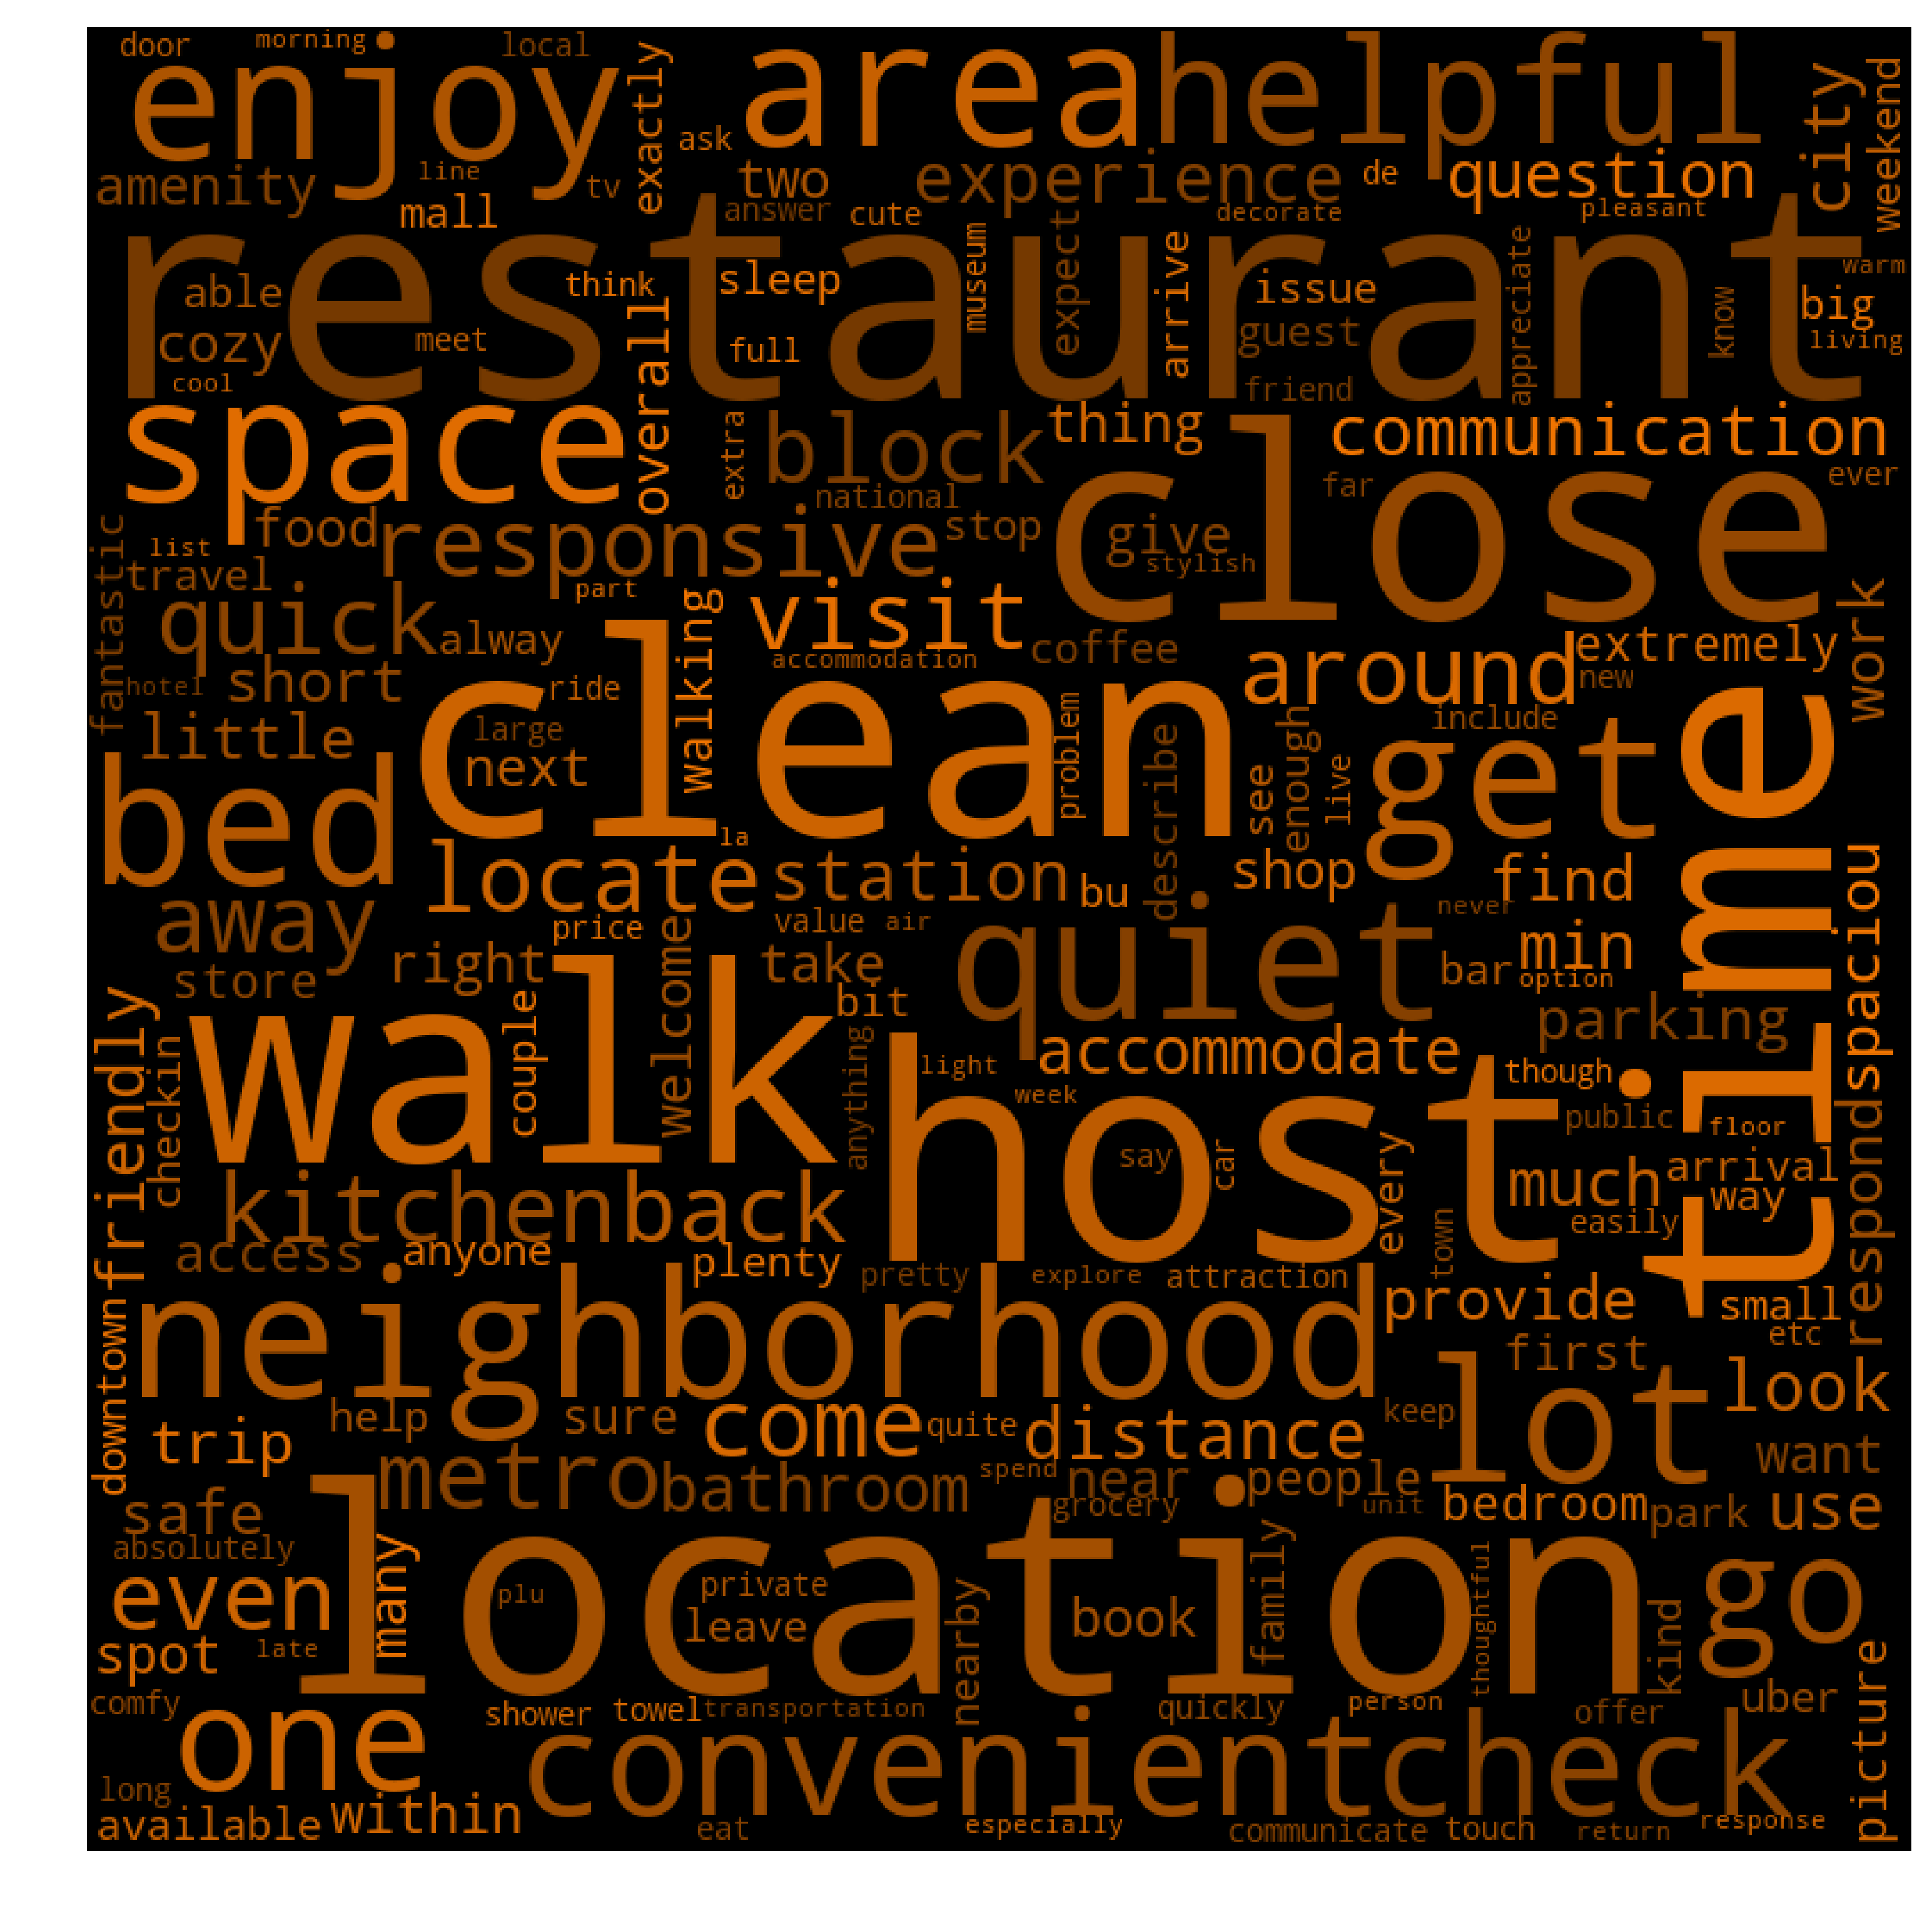

In [19]:
# plot the WordCloud image                     
plt.figure(figsize = (10, 10), facecolor = None, dpi=300) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

We can also customize the `mask` of wordcloud. For example, the above wordcloud represented in the outline of District of Columbia could be aesthically more pleasing and interesting. As the process is a little involved it would be better to cover it in a separate tutorial. I have added a reference to the same in the further readings section below. 

### Advantages/Disadvantages:

The advantage of wordcloud is that it is very simple and easy to understand for most audience and don't require any domain expertise to comprehend. Additionally, they summarize the document succinently and allow us to draw inferences. Using the library is very easy with just parameter specification. 

However, there are disadvantages to wordcloud representation of text data too. As mentioned, wordclouds work best with use-case specific data cleaning. The visual may be misleading if the pre-processing is done incorrectly or insufficiently. Additionally, the frequency based method may not be the best way to summarize the data. The words that occur most frequently in a corpus are not necessarily the most important and relevant summary of it. Hence, methods like TF-IDF may be better suited for creating a summary as explained in the next section.

### Alternatives:

Another way to find most important topics in a corpus formed from set of documents is using `sklearn` TF-IDF Vectorizer or a combination of Count Vectorizer and TF-IDF Transformer. These techniques help in reducing a bag of words by creating a weighted frequency matrix where the frequency of occurence is transformed to take into account the importance of the word across documents.   

This matrix can be then further analyzed using unsupervised learning techniques like LDA and clustering for topic modeling and finding most frequently occuring words across these topics. 

### Further readings: 

- [wordcloud documentation](https://pypi.org/project/wordcloud/)
- [towardsdatascience wordcloud tutorial](https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc)
- [Datacamp tutorial with Mask](https://www.datacamp.com/community/tutorials/wordcloud-python)
- [My github repo for detailed codes](https://github.com/nt03/dviz_ML_tutorial)